In [42]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegression(object):
    def __init__(self,fit_intercept = True, solver= 'sgd', if_standard = True, epchos = 10, eta=1e-2, batch_size=1) -> None:
        super().__init__()
        self.w = None
        self.fit_intercept = fit_intercept
        self.solver = solver
        self.if_standard = if_standard
        self.epchos = epchos
        self.eta = eta
        self.batch_size = batch_size
        if if_standard:
            self.feature_mean = None
            self.feature_std = None

    def InitParams(self,feature):
        self.w = np.random.random(size=(feature,1))
#   求解伪逆，用svd分解的方法
    def _FitCloseForm(self,x,y):
        self.w = np.linalg.pinv(x).dot(y)
    
#   使用随机梯度下降求解
    def _FitSdg(self,x,y):
        '''
        param x:
        param y:
        param epochs
        param eta
        param bacth_size
        return
        '''
        x_y = np.c_[x,y]
        for _ in range(self.epchos):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size ):
                batchxy = x_y[self.batch_size*index: self.batch_size*(index+1)]
                batchx = batchxy[:,:-1]
                batchy = batchxy[:,-1:]

                dw = -2* np.transpose(batchx) @ (batchy - batchx @ self.w) / self.batch_size
                self.w = self.w -  self.eta *dw
   
    def fit(self,x,y):
        if self.if_standard:
            self.feature_mean = np.mean(x,axis=0)
            self.feature_std = np.std(x,axis=0)+1e-8
            x = (x - self.feature_mean) / self.feature_std
        if self.fit_intercept:
            x = np.c_[x,np.ones_like(y)]
        self.InitParams(x.shape[1])

        if self.solver == 'closeform':
            self._FitCloseForm(x,y)
        elif self.solver == 'sgd':
            self._FitSdg(x,y)

    def getparams(self):
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w/ self.feature_std.reshape(-1,1)
            b = b - w.T.dot(self.feature_mean.reshape(-1,1))
        return w.reshape(-1), b
    
    def _predict(self,x):
        if self.if_standard:
            x = (x-self.feature_mean)/self.feature_std
        if self.fit_intercept:
            x = np.c_[x,np.ones(shape=x.shape[0])]
        return x.dot(self.w) 
    
    def plot_fitboundary(self,x,y):
        plt.scatter(x[:,0],y)
        plt.plot(x[:, 0], self._predict(x), 'r')
    


   


In [39]:
import numpy as np
#造伪样本
X=np.linspace(0,100,100)
X=np.c_[X,np.ones(100)]
w=np.asarray([3,2])
Y=X.dot(w)
X=X.astype('float')
Y=Y.astype('float')
X[:,0]+=np.random.normal(size=(X[:,0].shape))*3

w (array([3.00695752]), array([[1.12840342]]))


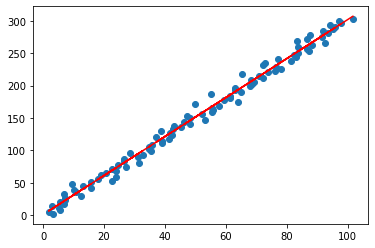

In [61]:
#测试
lr=LinearRegression(solver='sgd')
lr.fit(X[:,:-1],Y)
predict=lr._predict(X[:,:-1])
#查看w
print('w',lr.getparams())
#查看标准差
np.std(Y-predict)
lr.plot_fitboundary(X[:,:-1],Y)